In [6]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

hdf = pd.read_csv('kc-house-data.csv', sep = ',', encoding = 'latin-1')
ldf = pd.read_csv('laptop_price.csv', sep = ',', encoding = 'latin-1')

## Задание 1 ##
1.2 Изучите стоимости недвижимости

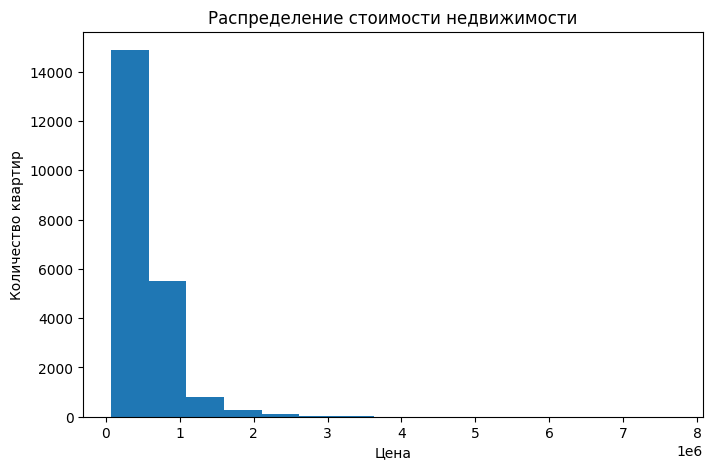

In [53]:
plt.figure(figsize=(8, 5))

plt.hist(hdf['price'], bins=15)
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Цена')
plt.ylabel('Количество квартир');

**Абсолютное большинство квартир имеют стоимость менее 2 млн у.е., наблюдаются единичные выбросы вплоть до 8 млн у.е.**

1.3 Изучите распределение квадратуры жилой

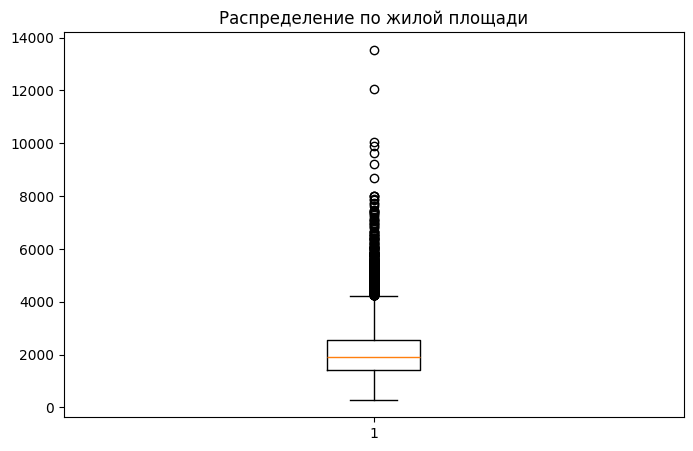

In [52]:
plt.figure(figsize=(8, 5))

plt.boxplot(x=hdf['sqft_living'])
plt.title('Распределение по жилой площади');

**Абсолютное большинство квартир имеют жилую площадь до 5000 кв.м. со значимым пиком в области 2000 кв.м., наблюдаются единичные выбросы вплоть до 140000 кв.м.**

1.4 Изучите распределение года постройки

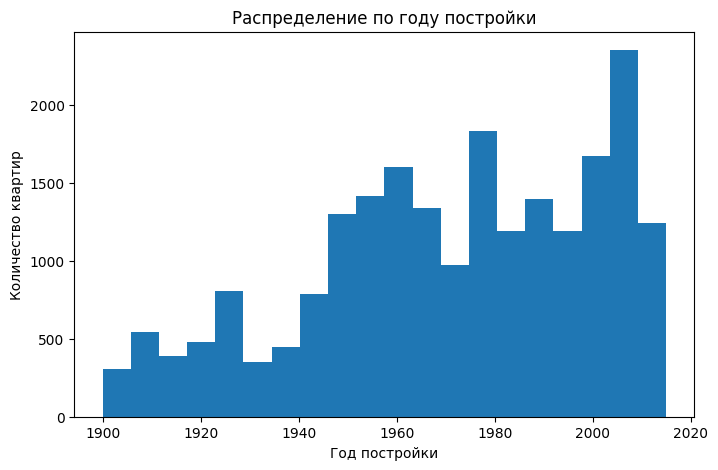

In [54]:
plt.figure(figsize=(8, 5))

plt.hist(hdf['yr_built'], bins=20)
plt.title('Распределение по году постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество квартир');

**Отмечается явная тенденция к увеличению количества квартир с увеличением года постройки** 

## Задание 2 ##

2.1. Изучите распределение домов от наличия вида на набережную

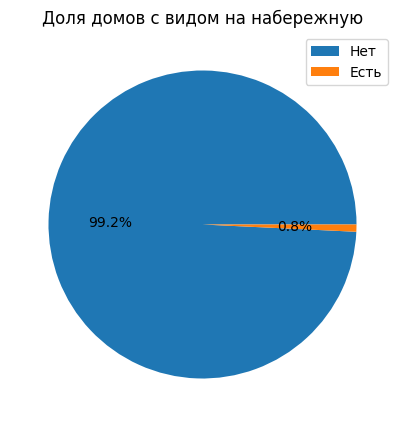

In [31]:
piedata = hdf['waterfront'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(piedata, autopct='%1.1f%%')
plt.title('Доля домов с видом на набережную')
plt.legend(['Нет', 'Есть']);

**Менее одного процента всех представленных домой имеют вид на набережную**

2.2. Изучите распределение этажей домов

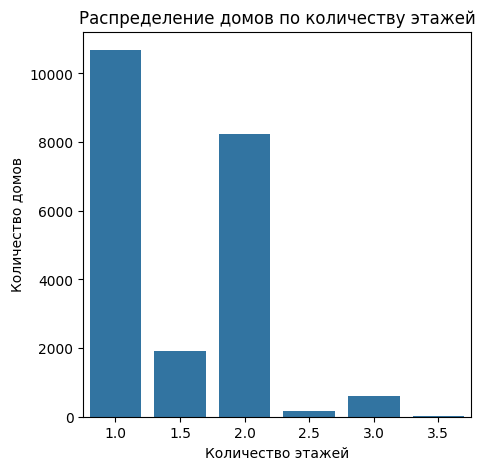

In [55]:
bardata = hdf['floors'].value_counts().reset_index()

plt.figure(figsize=(5, 5))
sns.barplot(x=bardata['floors'], y=bardata['count'])
plt.title('Распределение домов по количеству этажей')
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов');

**Среди представленных домов большинство имеет 1 либо 2 этажа**

2.3. Изучите распределение состояния домов

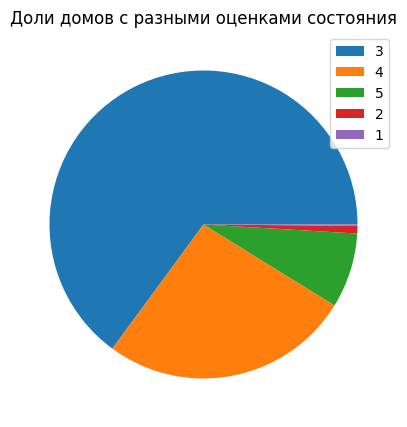

In [49]:
condata = hdf['condition'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(condata);
plt.title('Доли домов с разными оценками состояния')
plt.legend(condata.index);

**Лишь единичные дома имеют оценку состояния менее "3"**

## Задание 3 ##
*Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.*

**Изучим матрицу корреляции признаков**

<Axes: >

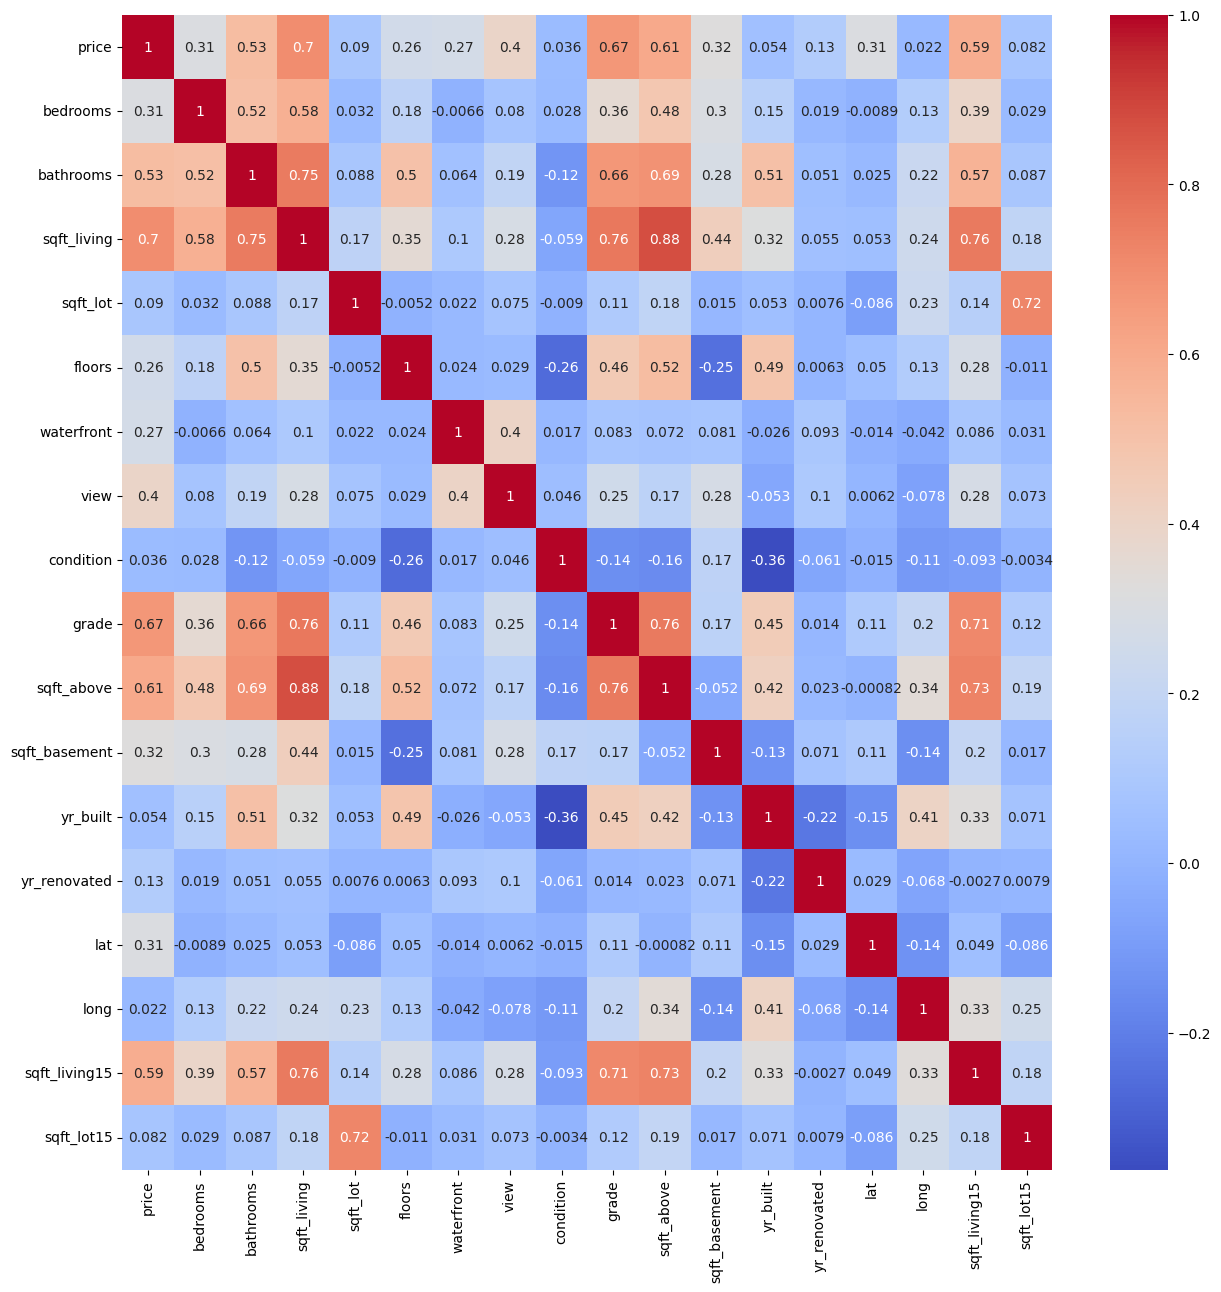

In [78]:
matrix = hdf.drop(columns=['id', 'date', 'zipcode']).corr()
plt.figure(figsize=(15, 15))
sns.heatmap(matrix, annot=True, cmap='coolwarm')

**Среди признаков, имеющих наибольшуюю корреляяцию со стоимостью можно отметить: количество ванных комнат, жилую площадь, площадь на поверхностью земли и обща площадь у 15 соседей. Наименьшая зависимость отмечается со следующими параметрами: общаяя площадь, оценка состояния и год постройки, широта и долгота**

**Изучим подробно отдельные параметры**

<Figure size 600x600 with 0 Axes>

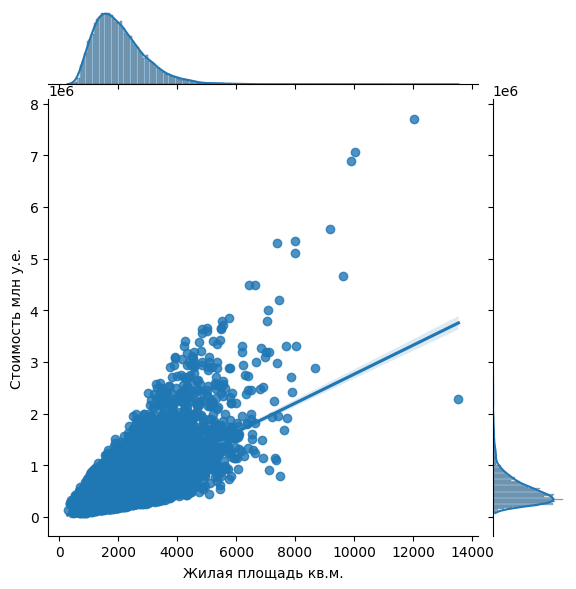

In [82]:
plt.figure(figsize=(6, 6))

sns.jointplot(x=hdf['sqft_living'], y=hdf['price'], kind='reg')
plt.xlabel('Жилая площадь кв.м.')
plt.ylabel('Стоимость млн у.е.')
plt.title('Зависимость стоимости от жилой площади');

**Отмечается прямая практически линейная зависимость жилой площади от стоимости жилья**

<Figure size 600x600 with 0 Axes>

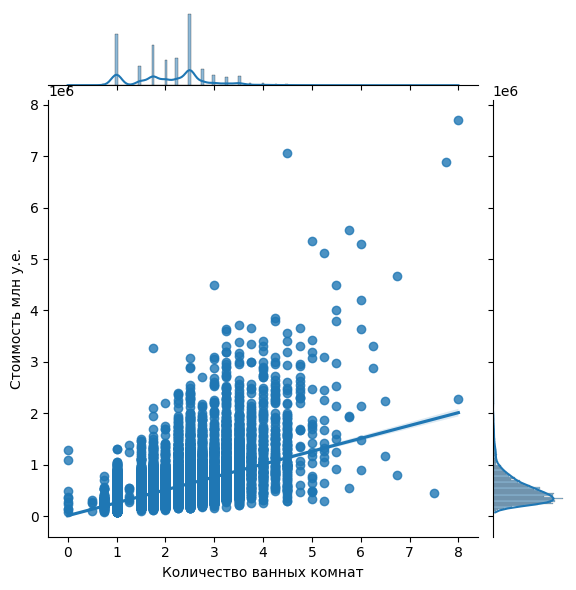

In [91]:
plt.figure(figsize=(6, 6))

sns.jointplot(x=hdf['bathrooms'], y=hdf['price'], kind='reg')
plt.xlabel('Количество ванных комнат')
plt.ylabel('Стоимость млн у.е.');

**Как ни странно, достаточно высокая степень прямой зависимости отмечается при сопоставлении стоимости и количества ванных комнат**

<Figure size 600x600 with 0 Axes>

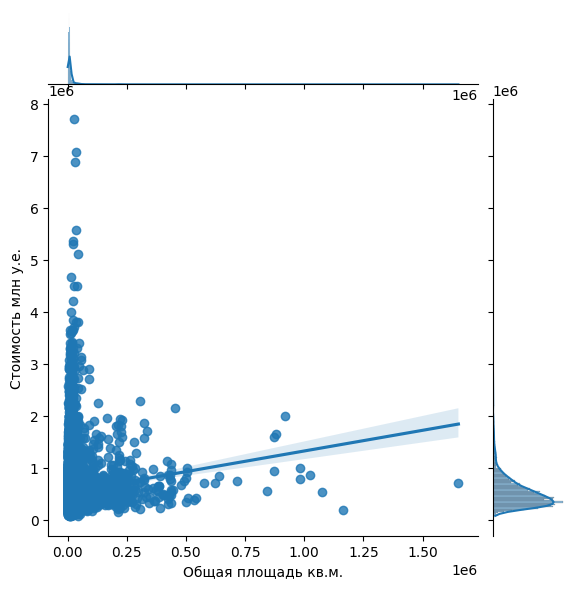

In [92]:
plt.figure(figsize=(6, 6))

sns.jointplot(x=hdf['sqft_lot'], y=hdf['price'], kind='reg')
plt.xlabel('Общая площадь кв.м.')
plt.ylabel('Стоимость млн у.е.')
plt.title('Зависимость стоимости от жилой площади');

**Явной зависимости между общей площадью и стоимостью жилья не отмечается**

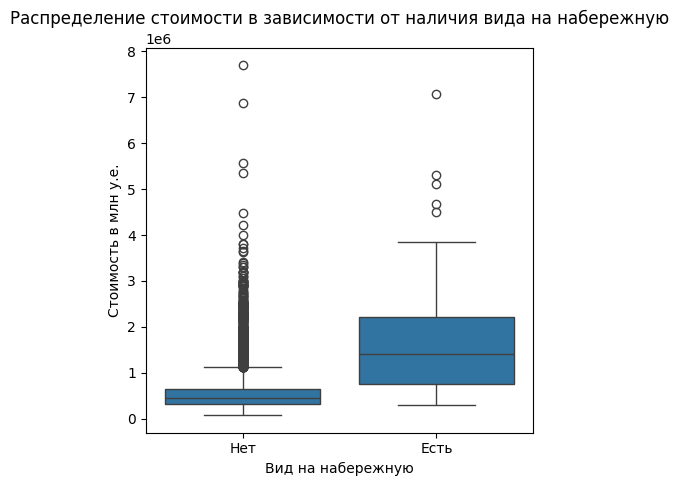

In [61]:
plt.figure(figsize=(5,5))

sns.boxplot(x=hdf['waterfront'], y=hdf['price'])
plt.title('Распределение стоимости в зависимости от наличия вида на набережную')
plt.xlabel('Вид на набережную')
plt.ylabel('Стоимость в млн у.е.')
plt.xticks([0, 1], ['Нет', 'Есть']);


**Несмотря на низкую степень корреляции, анализируя график распределения стоимости недвижимости с учетом наличия вида на набережную, можно отметить, что большая часть домов с видом находятся в более высоком ценовом диапазоне в сравнении с большинством домов, не имющими последнего.**